In [20]:
import numpy as np


In [21]:
#our imaginary data

x_train = np.random.rand(100,10).astype(np.float32)
y_train = np.random.rand(100,1).astype(np.float32)

In [22]:
#imports library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [23]:
#define the Sequential model using a list of layers
seq_model = Sequential([
    Input(shape=(10,)),
    Dense(32, activation='relu'),   # Input layer
    Dense(16, activation='relu'),   # First hidden layer
    Dense(1)                        #Output layer

    ])


In [24]:
#you can also write like this
seq_model = Sequential()
seq_model.add(Input(shape=(10,)))
seq_model.add(Dense(32,activation='relu'))
seq_model.add(Dense(16,activation='relu'))
seq_model.add(Dense(1))
seq_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.utils import plot_model

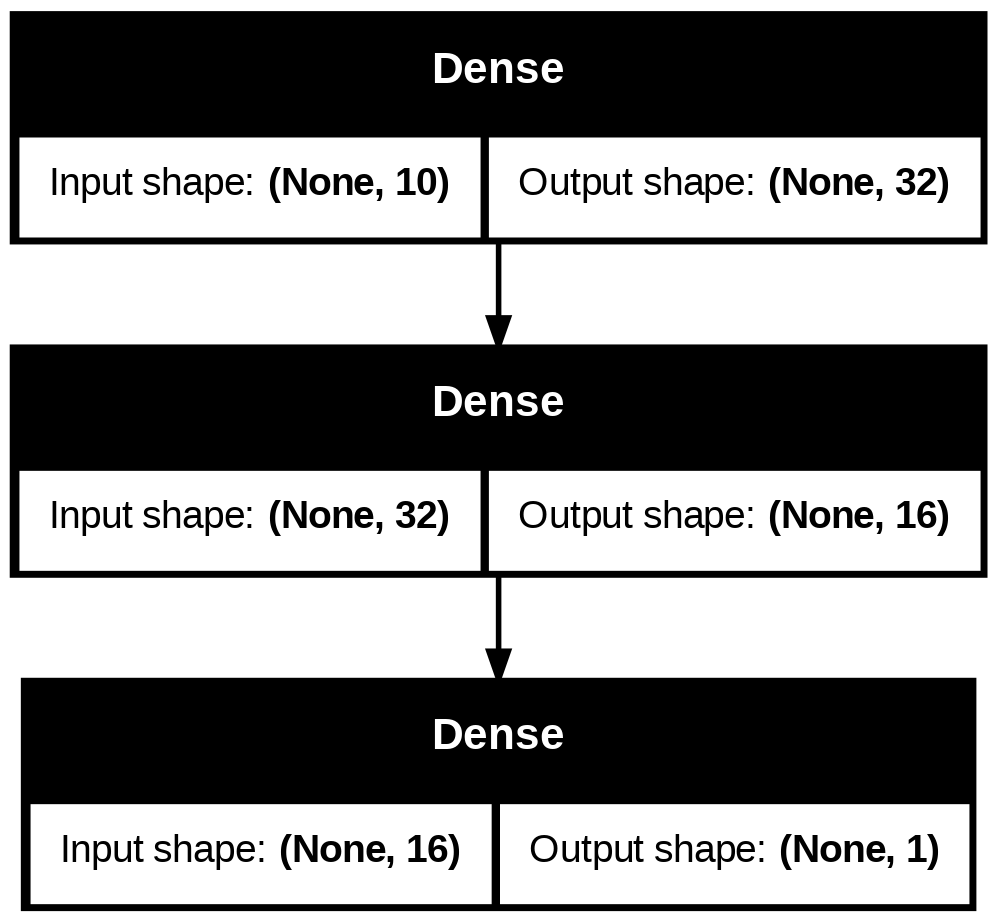

In [26]:
plot_model(seq_model,show_shapes=True,expand_nested=True)

In [27]:
#compile the model
seq_model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [28]:
#lets make it
inputs=Input(shape=(10,))
#now the dense layers
x=Dense(32,activation='relu')(inputs)
x=Dense(16,activation='relu')(x)
outputs=Dense(1)(x)
func_model=tf.keras.Model(inputs=inputs,outputs=outputs)
func_model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

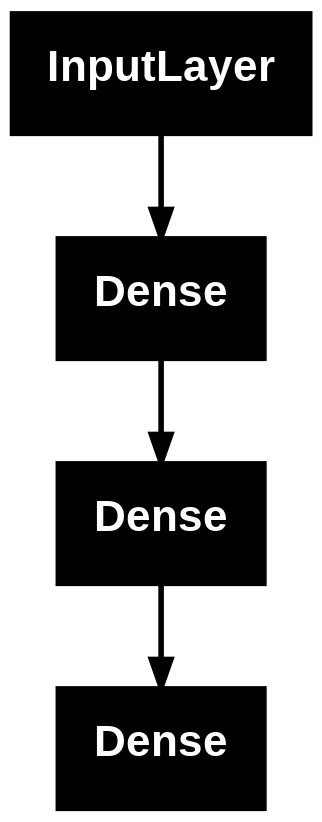

In [29]:
plot_model(func_model)

Training method

In [30]:
import time

In [31]:
start = time.time()
seq_model.fit(x_train, y_train, epochs=5, batch_size=8)
end=time.time()
print(f'Time....{end-start:.2f}')

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2143 - mae: 0.3667
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1209 - mae: 0.2860 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1177 - mae: 0.2895 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1162 - mae: 0.2851 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0957 - mae: 0.2713 
Time....1.42


In [35]:
func_model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [36]:
#function model
start=time.time()
func_model.fit(x_train, y_train, epochs=5, batch_size=8)
end=time.time()
print(f'Time....{end-start:.2f}')

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3839 - mae: 0.5487
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1909 - mae: 0.3455 
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1436 - mae: 0.3135 
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0980 - mae: 0.2669 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0968 - mae: 0.2730 
Time....1.60


In [45]:
# we need to import an other library
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate

input1 = Input(shape=(10,),name='First_input')
x1=Dense(32,activation='relu')(input1)
x=Dense(16,activation='relu')(x1)

input2 = Input(shape=(5,),name='Second_input')
x2=Dense(32,activation='relu')(input2)
x=Dense(16,activation='relu')(x2)

merged_out=Concatenate()([x1,x2])
final_out=Dense(1,name='Output')(merged_out)

cool_func_model=Model(inputs=[input1,input2],outputs=final_out)

In [46]:
cool_func_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse',metrics=['mae'])

In [41]:
lions = np.random.rand(1000,10)
tigers =np.random.rand(1000,5)
bite_force= np.random.rand(1000,1)

AttributeError: 'NoneType' object has no attribute 'shape'

In [52]:
# Loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model=func_model
#model=seq_model
epochs = 5
batch_size = 8
start=time.time()
#custom training loop
for epochs in range(epochs):
  print(f'epochs{epochs +1}/{epochs}')
  for i in range(0, len(x_train),batch_size):
    #Get a batch of data
    x_batch = x_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]

    with tf.GradientTape() as tape:
      #farword pass
      predictions = model(x_batch, training=True)
      loss = loss_fn(y_batch,predictions)

    #coimpute the gradient and update weights
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  print(f'Loss after epoch{epochs +1}:{loss.numpy():.4f}')
end=time.time()
print(f'Time....:{end-start:.2f}')

epochs1/0
Loss after epoch1:0.1688
epochs2/1
Loss after epoch2:0.1660
epochs3/2
Loss after epoch3:0.1594
epochs4/3
Loss after epoch4:0.1579
epochs5/4
Loss after epoch5:0.1549
Time....:2.31


In [55]:
# Loss function and optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model=func_model

#model=seq_model
epochs = 5
batch_size = 8
start=time.time()
#custom training loop
for epochs in range(epochs):
  print(f'epochs{epochs +1}/{epochs}')
  for i in range(0, len(x_train),batch_size):
    #Get a batch of data
    x_batch = x_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]

    with tf.GradientTape() as tape:
      #farword pass
      predictions = model(x_batch, training=True)
      loss = loss_fn(y_batch,predictions)

    #coimpute the gradient and update weights
    gradients = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

  print(f'Loss after epoch{epochs +1}:{loss.numpy():.4f}')
end=time.time()
print(f'Time....:{end-start:.2f}')

SyntaxError: invalid syntax (<ipython-input-55-1184c75f371f>, line 9)